# Chapter 6 MINST

In [3]:
# numerical and scientific computing libraries
import numpy as np
import scipy as sp

# plotting libraries 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# for pretty printing
np.set_printoptions(4, linewidth=100, suppress=True)

## SVD of MNIST

Let us download the MNIST data set and analyze it.

In [ ]:
# let's download MINIST dataset as a numpy array each row is an image
# and each column is a pixel
# the target is a number from 0 to 9
# the dataset is already split into training and testing
# the training set is the first 60000 images
# the testing set is the last 10000 images
# the images are 28x28 pixels
# the pixels are from 0 to 255
# the target is a string
# the dataset is already shuffled
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X = X.to_numpy().astype(np.float64)
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

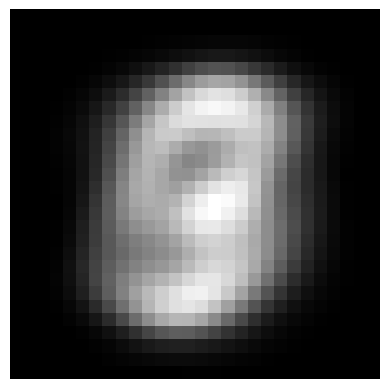

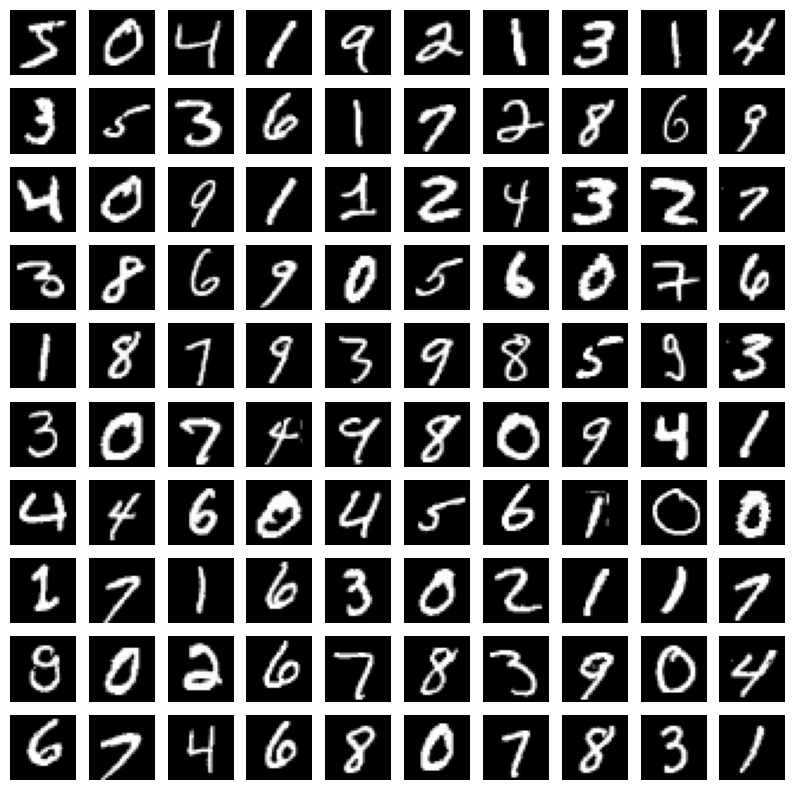

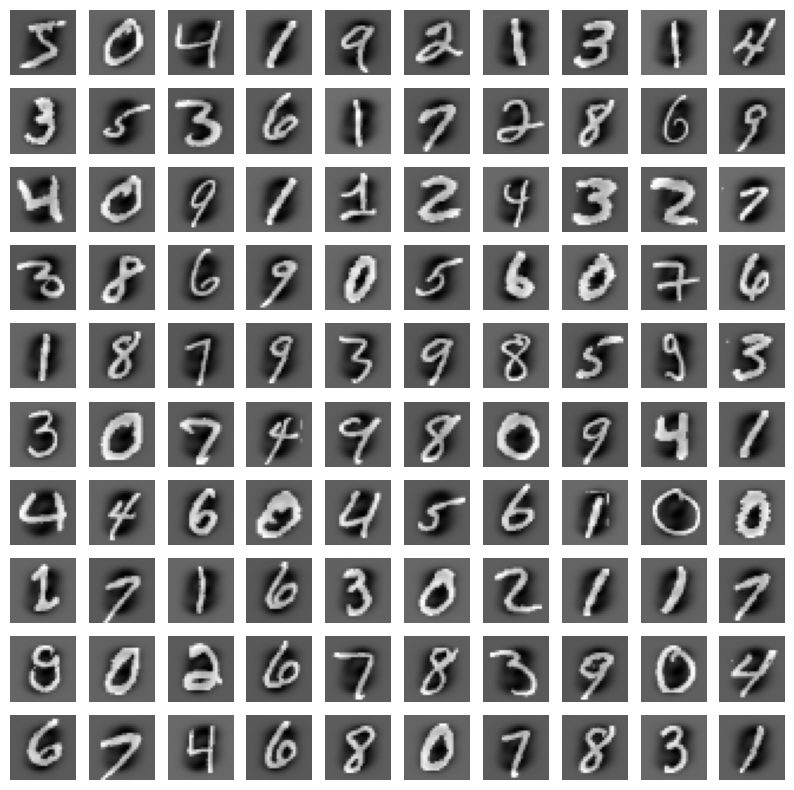

In [ ]:
# subtract the column-wise mean of X
mean_mnist = np.mean(X_train, axis=0)
X_train_centered = X_train - mean_mnist

# let's plot the mean image
plt.imshow(mean_mnist.reshape(28, 28), cmap="gray")
plt.axis('off')
plt.show()

# let's plot the first 100 images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()

# let's plot the first 100 centered images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train_centered[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()

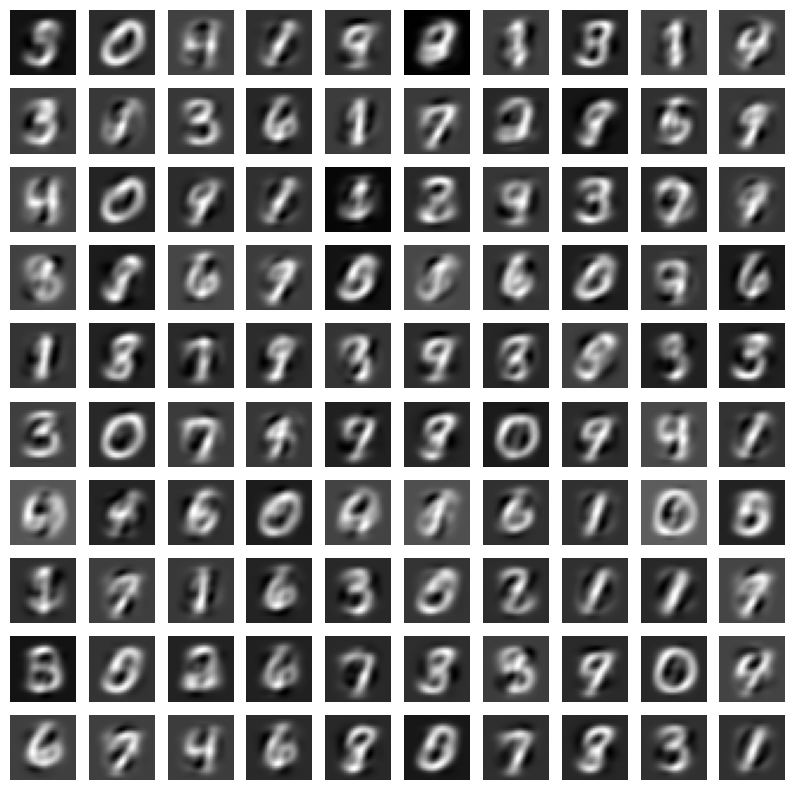

In [17]:
# let's do svd
U, S, Vt = np.linalg.svd(X_train_centered, full_matrices=False)

# let's reconstruct images using the first k singular values
k = 10
X_train_reconstructed = (U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]) + mean_mnist

# let's plot the first 100 reconstructed images
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X_train_reconstructed[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()

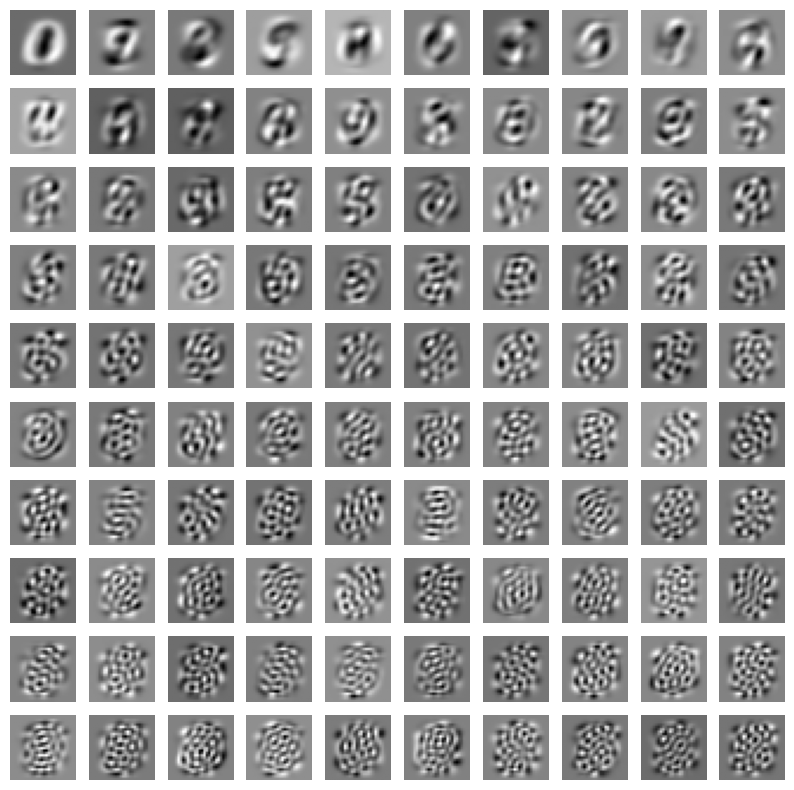

In [18]:
# let's plot the first 100 images of right singular vectors
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(Vt[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()

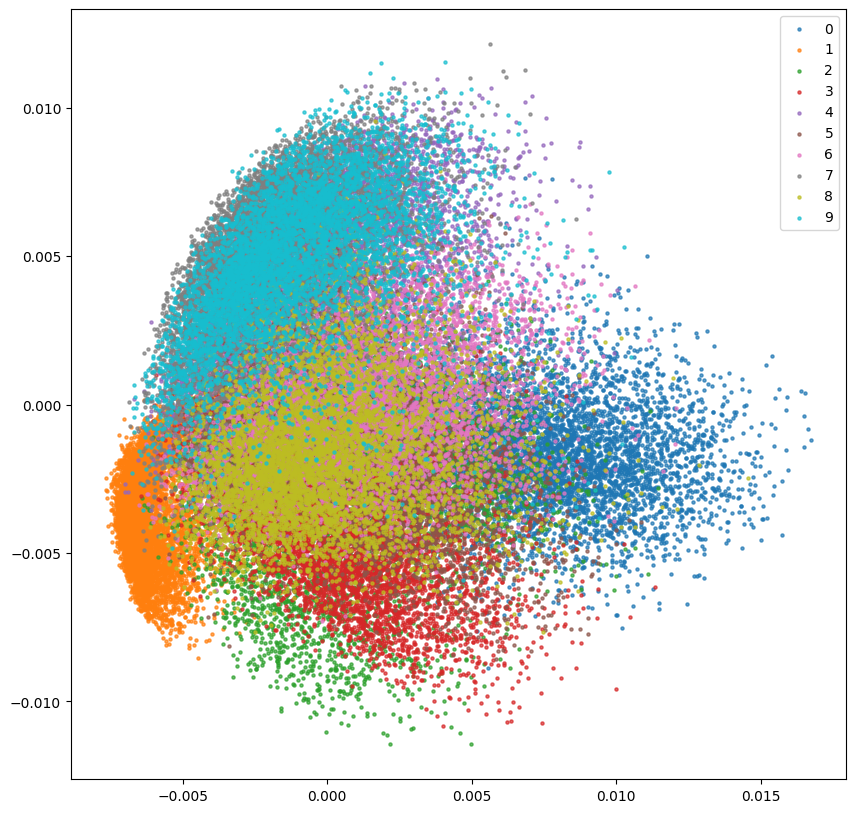

In [25]:
# let's plot the first 2 coordinates of U with legends from the target, middle-size dots and alpha=0.1, pretty
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.scatter(U[y_train == str(i), 0], U[y_train == str(i), 1], label=str(i), s=5, alpha=0.7)
plt.legend()
plt.show()

In [ ]:
# let's compute the mean vector of data points for each target
mean_vectors = np.array([np.mean(U[y_train == str(i)], axis=0) for i in range(10)])

# let's print the mean vectors shape
print(mean_vectors.shape)

p= 20
# take the first p coordinates of the mean vectors
mean_vectors_p = mean_vectors[:, :p]
print(mean_vectors_p.shape)

print(U[2,:p].shape)


(10, 784)
(10, 20)
(20,)


0.7912
6 2


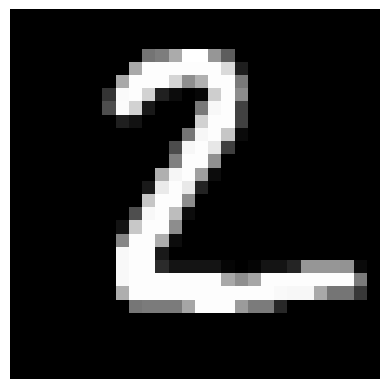

2 5


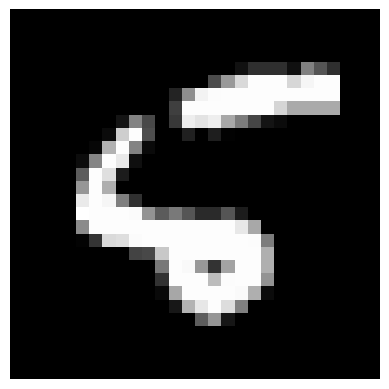

7 9


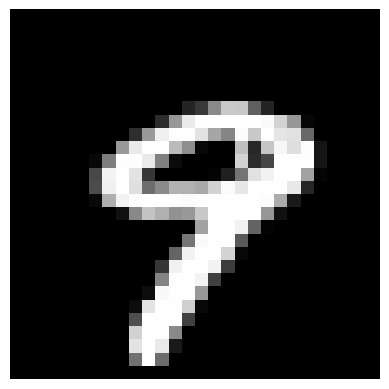

0 6


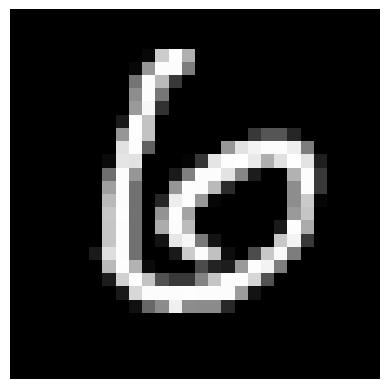

3 5


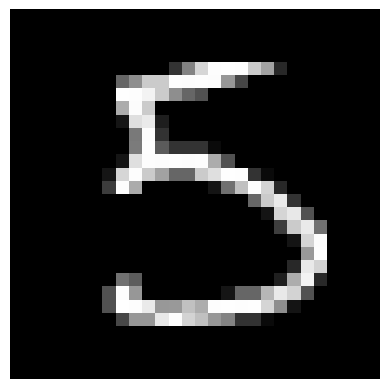

4 9


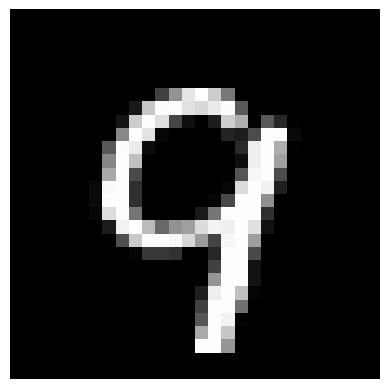

6 3


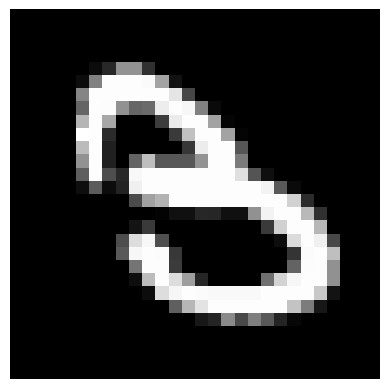

7 9


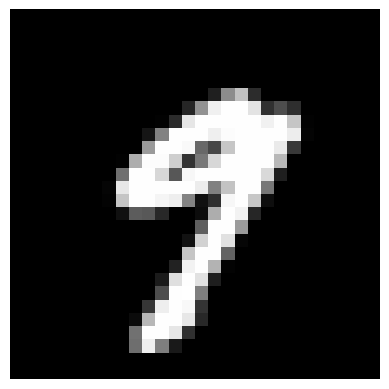

4 6


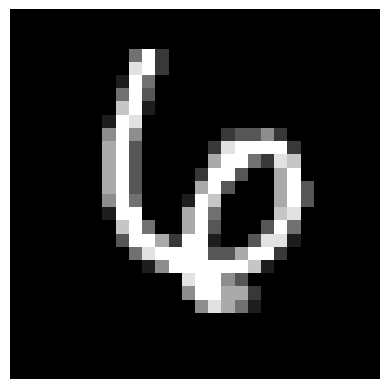

0 4


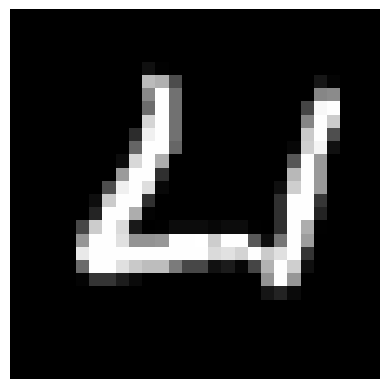

In [62]:
y_pred = []
# let's classify the first 10000 test images using the first p coordinate of mean vectors
U_test = (X_test - mean_mnist) @ Vt[:p, :].T
for i in range(10000):
    y_pred.append(np.argmin(np.linalg.norm(np.ones((10,1)) @ U_test[i, :p].reshape(-1,p) - mean_vectors_p, axis=1), axis=0))
accuracy = np.mean(y_pred == y_test.astype(int))
print(accuracy)
# let's print (y_pred,  y_test) for the wrongly predicted images
n_wrong = 0
for i in range(10000):
    if (str(y_pred[i]) != y_test[i]) and n_wrong < 10:
        print(y_pred[i], y_test[i])
        plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
        plt.axis('off')
        plt.show()
        n_wrong += 1
